# Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to
first collect information on recent houses sold and make a model of housing prices.

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('../data/ex1data2.txt', delimiter=',')
print(data[1:10,])

[[  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]
 [  1.98500000e+03   4.00000000e+00   2.99900000e+05]
 [  1.53400000e+03   3.00000000e+00   3.14900000e+05]
 [  1.42700000e+03   3.00000000e+00   1.98999000e+05]
 [  1.38000000e+03   3.00000000e+00   2.12000000e+05]
 [  1.49400000e+03   3.00000000e+00   2.42500000e+05]]


## Feature Normalization

The script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the code in featureNormalize to

* Subtract the mean value of each feature from the dataset.
* After subtracting the mean, additionally scale (divide) the feature values by their respective "standard deviations."

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within $\pm2$ standard deviations of the mean); this is an alternative to taking the range of values (max-min).

In [2]:
def featureNormalize(X):
    """
    FEATURENORMALIZE(X) returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    
    mu = X.mean(axis = 0, keepdims = True)
    sigma = X.std(axis = 0, keepdims = True)
    
    Xnorm = (X - mu) / sigma
    
    return Xnorm, mu, sigma

# Scale features and set them to zero mean
X = np.c_[data[:,[0,1]]]
y = np.c_[data[:,2]]

# Normalizing Features
[Xnorm, mu, sigma] = featureNormalize(X)

# Add intercept term to X
Xnorm = np.c_[np.ones(Xnorm.shape[0]), Xnorm]

## Gradient Descent

Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.

**Implementation Note:** In the multivariate case, the cost function can also be written in the following vectorized form:

\begin{equation}
J(\theta) = \frac{1}{2m} (X\theta- {y})^{T}(X\theta- {y})
\end{equation}

where

\begin{equation}
X = 
\begin{bmatrix}
- (x^{(1)})^{T} - \\
- (x^{(2)})^{T} - \\
\vdots \\
- (x^{(m)})^{T} - \\
\end{bmatrix}
\end{equation}

and

\begin{equation}
y = 
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} \\
\end{bmatrix}
\end{equation}

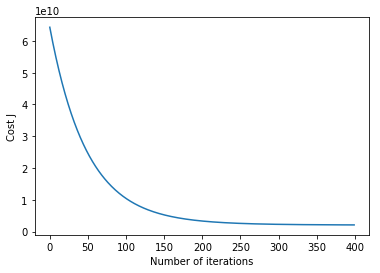

Theta computed from gradient descent: 

[[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $286003.88


In [3]:
# Choose some alpha value
alpha = 0.01
num_iters = 400

# Compute cost for linear regression
def computeCost(X, y, theta):
    """
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    
    m = y.size
    J = 1 / (2 * m) * np.sum((X.dot(theta) - y)**2)
    
    return(J)

# Perform gradient descent to learn theta
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    
    m = y.size
    J_history = np.zeros([num_iters, 1])
    
    for i in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha * 1 / m * (X.T.dot(h - y))
        J_history[i] = computeCost(X, y, theta)
    
    return theta, J_history

# Init Theta and Run Gradient Descent 
theta = np.zeros([3,1])
[theta, J_history] = gradientDescent(Xnorm, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(J_history)
plt.ylabel('Cost J')
plt.xlabel('Number of iterations')
plt.show()

# Display gradient descent's result
print('Theta computed from gradient descent: \n');
print(theta);

# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. Thus, it does not need to be 
# normalized.

Xnew = np.array([1, (1650 - mu[0,0]) / sigma[0,0], 3 - mu[0,1]/sigma[0,1]])
price = Xnew.dot(theta).round(2)[0]

print("\nPredicted price of a 1650 sq-ft, 3 br house (using gradient descent): $"
      + str(price))

## Selecting learning rates

In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly.

The next phase in will call your gradientDescent function and run gradient descent for about 50 iterations at the chosen learning
rate. The function should also return the history of $J(\theta)$ values in a vector J. After the last iteration, the script plots the J values against the number of the iterations.

If you picked a learning rate within a good range, your plot look similar the previous Figure. If your graph looks very different, especially if your value of $J(\theta)$ increases or even blows up, adjust your learning rate and try again. 

We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

**Implementation Note:** If your learning rate is too large, $J(\theta)$ can diverge and "blow up", resulting in values which are too large for computer calculations.

Notice the changes in the convergence curves as the learning rate changes. With a small learning rate, you should find that gradient descent takes a very long time to converge to the optimal value. Conversely, with a large learning rate, gradient descent might not converge or might even diverge!

Using the best learning rate that you found, run the script
to run gradient descent until convergence to find the final values of $\theta$. Next, use this value of $\theta$ to predict the price of a house with 1650 square feet and 3 bedrooms. You will use value later to check your implementation of the normal equations. Don't forget to normalize your features when you make this prediction!

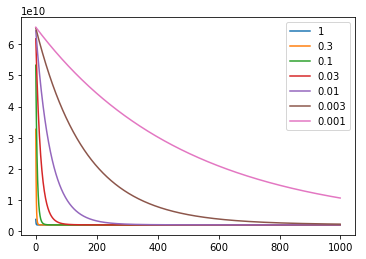

In [4]:
alpha_v = [1, 0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
num_iters = 1000

for a in alpha_v:
    theta = np.zeros([3,1])
    [theta, J_history] = gradientDescent(Xnorm, y, theta, a, num_iters)
    plt.plot(J_history, label = a)
plt.legend(loc = 1)
plt.show()

In [5]:
# Init Theta and Run Gradient Descent 
alpha = 1
theta = np.zeros([3,1])
[theta, J_history] = gradientDescent(Xnorm, y, theta, alpha, num_iters)

# Display gradient descent's result
print('Theta computed from gradient descent: \n');
print(theta);

# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. Thus, it does not need to be 
# normalized.

Xnew = np.array([1, (1650 - mu[0,0]) / sigma[0,0], 3 - mu[0,1]/sigma[0,1]])
price = Xnew.dot(theta).round(2)[0]

print("\nPredicted price of a 1650 sq-ft, 3 br house (using gradient descent): \n$"
      + str(price))

Theta computed from gradient descent: 

[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): 
$299560.46


## Normal Equations

The closed-form solution to linear regression is
\begin{equation}
\theta = (X^{T}X)^{-1} X^{T} {y}
\end{equation}

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no "loop until convergence" like in gradient descent.

In [6]:
# Compute the closed-form solution to linear regression
def normalEqn(X, y):
    """
    NORMALEQN(X,y) computes the closed-form solution to linear 
    regression using the normal equations.
    """
    
    tmp =  X.T.dot(X)
    tmp = np.linalg.inv(tmp)
    
    theta = tmp.dot(X.T).dot(y)
    return(theta)

theta_norm = normalEqn(Xnorm, y)

# Display normal equations's result
print('Theta computed from normal equations: \n');
print(theta_norm);

# Estimate the price of a 1650 sq-ft, 3 br house
price_norm = Xnew.dot(theta_norm).round(2)[0]
print("\nPredicted price of a 1650 sq-ft, 3 br house (using closed-form solution): \n$"
      + str(price_norm))

Theta computed from normal equations: 

[[ 340412.65957447]
 [ 109447.79646964]
 [  -6578.35485416]]

Predicted price of a 1650 sq-ft, 3 br house (using closed-form solution): 
$299560.46


## Ordinary Least Squares using scikit learn

LinearRegression fits a linear model with coefficients $w = (w_1, ..., w_p)$ to minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. Mathematically it solves a problem of the form:

\begin{equation}
\underset{w}{min\,} {|| X w - y||_2}^2
\end{equation}

LinearRegression will take in its fit method arrays X, y and will store the coefficients w of the linear model in its coef_ member.

In [7]:
from sklearn.linear_model import LinearRegression

# Fitting Multiple Linear Regression 
regressor = LinearRegression(fit_intercept=True, normalize=True)
regressor.fit(X, y)

theta_sk = np.array([regressor.intercept_[0], 
                    regressor.coef_[0,0],
                    regressor.coef_[0,1]]).reshape(3,1)
    
# Display sklearn's result
print('Theta computed from sklearn LinearRegression: \n');
print(theta_sk);

# Estimate the price of a 1650 sq-ft, 3 br house
price_sk = regressor.predict(np.array([1650, 3]).reshape(1,2))
price_sk = price_sk.round(2)
 
print("\nPredicted price of a 1650 sq-ft, 3 br house (using sklearn): \n$"
      + str(price_sk[0,0]))

Theta computed from sklearn LinearRegression: 

[[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]

Predicted price of a 1650 sq-ft, 3 br house (using sklearn): 
$293081.46
